<a href="https://colab.research.google.com/github/HiInvoker/machineLearning/blob/master/least_square_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret
  
  
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    M    为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq  
  

Fitting Parameters: [0.04444457]


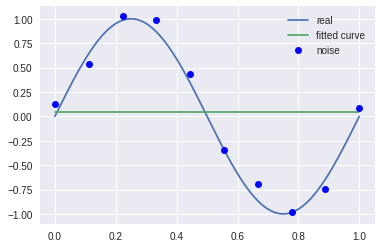

In [0]:
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.37111428  0.73000171]


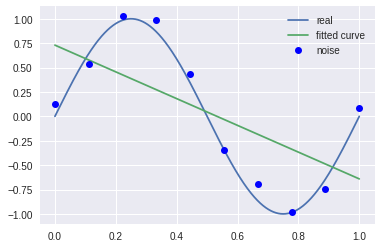

In [0]:
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 2.09664358e+01 -3.15963056e+01  1.07082868e+01 -1.64901637e-02]


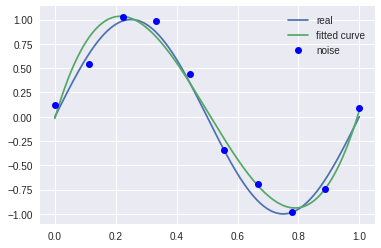

In [0]:
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-1.88313402e+04  8.23913033e+04 -1.50708199e+05  1.49730624e+05
 -8.79435515e+04  3.11987033e+04 -6.54005506e+03  7.30854366e+02
 -2.83734121e+01  1.22016508e-01]


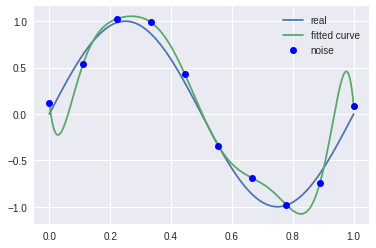

In [0]:
p_lsq_9 = fitting(M=9)

In [0]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [0]:
p_init = np.random.rand(9+1)

p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))


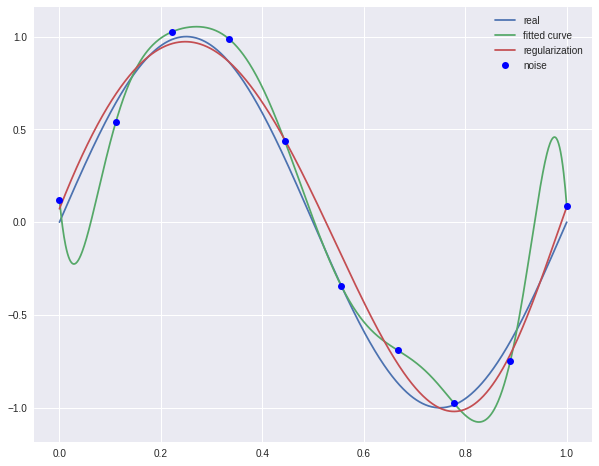

In [0]:
fig = plt.figure(figsize = (10, 8))
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()
plt.show()